In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
random.seed(42)

In [ ]:
# Use here if csv file is not uploaded at the files section
#uploaded = files.upload() 
#df = pd.read_csv(io.BytesIO(uploaded['Project1-Classification.csv']))

# Use here if csv file is uploaded at the files section
df = pd.read_csv('Project1-Classification.csv')

In [ ]:
# Few Samples from Data
df.head()

,full_text,summary,keywords,publish_date,authors,url,leaf_label,root_label
0,"'Pure Hockey, the largest hockey retailer in t...","'Pure Hockey, the largest hockey retailer in t...","['acquire', 'agrees', 'nevada', 'retail', 'hoc...",2022-10-21 17:11:22+00:00,['Ein News'],https://www.einnews.com/pr_news/597148062/pure...,hockey,sports
1,'HKO Hockey Canada Sponsorship 20221006\n\nHoc...,'The tally of Hockey Canada’s sponsorship loss...,"['sexual', 'exclusive', 'settlement', 'million...",NaN,['Barbara Shecter'],https://ca.finance.yahoo.com/news/exclusive-ho...,hockey,sports
2,'Canadian Prime Minister Justin Trudeau said W...,'Canadian Prime Minister Justin Trudeau said W...,"['québec', 'surprise', 'trust', 'sexual', 'org...",2022-10-05 00:00:00,['The Athletic Staff'],https://theathletic.com/3659888/2022/10/05/hoc...,hockey,sports
3,'Hockey Canada paid a crisis communications fi...,'Nicholson says that Hockey Canada did not go ...,"['sexual', 'organization', 'million', 'ceo', '...",2022-11-15 00:00:00,['Dan Robson'],https://theathletic.com/3900630/2022/11/15/hoc...,hockey,sports
4,'The Denver Broncos are looking for a new head...,'The Denver Broncos are looking for a new head...,"['beats', 'force', 'season', 'teams', 'anchora...",NaN,"['Parker Seibold', 'The Gazette', 'Gazette File']",https://gazette.com/multimedia/photo-air-force...,hockey,sports


In [ ]:
####################QUESTION 1: ####################

#Size of the dataset, 3150 samples , 8 features
print(df.shape)

# Overview: How many rows (samples) and columns (features) are present in the dataset/
# Answer: 3150 Samples, 8 Features

(3150, 8)


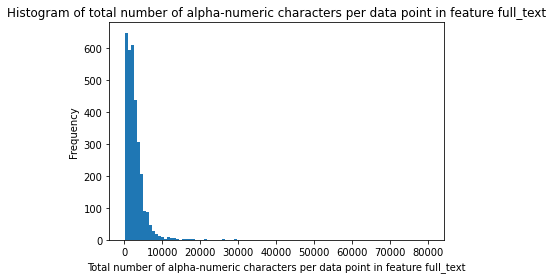

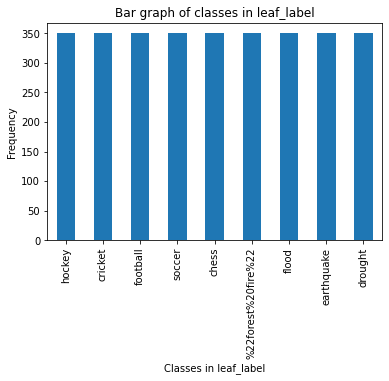

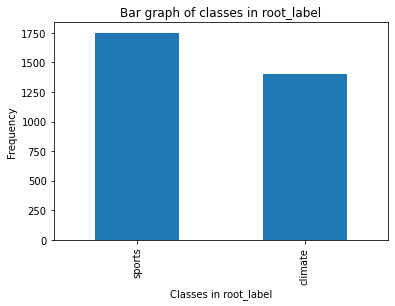

In [ ]:
full_text = df["full_text"]
num_alnum_full_text =[]
for i in range(0,full_text.shape[0]):
    sample = full_text.iloc[i]
    count = sum(ch.isalnum() for ch in sample )
    num_alnum_full_text.append(count)

num_class_leaf_label = df['leaf_label'].value_counts()
num_class_root_label = df['root_label'].value_counts()
#Plotting the total number of alpha-numeric characters perdata point (row) in the feature full text
plt.hist(num_alnum_full_text, bins = 100)
plt.xlabel('Total number of alpha-numeric characters per data point in feature full_text')
plt.ylabel('Frequency')
plt.title('Histogram of total number of alpha-numeric characters per data point in feature full_text')
plt.show()
print('\n')

#Plotting the histogram of classes in leaf_label
num_class_leaf_label.plot(kind = 'bar')
plt.xlabel('Classes in leaf_label')
plt.ylabel('Frequency')
plt.title('Bar graph of classes in leaf_label')
plt.show()
print('\n')

#Plotting the histogram of classes in root_label
num_class_root_label.plot(kind = 'bar')
plt.xlabel('Classes in root_label')
plt.ylabel('Frequency')
plt.title('Bar graph of classes in root_label')
plt.show()
print('\n')

#Provide Qualitative interpretations of histograms.

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df[["full_text","root_label","leaf_label","keywords"]], test_size=0.2)

In [ ]:
######## QUESTION 2 #########
# Report the number of training and testing samples
print('Size of train dataset: ', train.shape)
print('Number of samples in train dataset: ', train.shape[0])

print('Size of test dataset: ', test.shape)
print('Number of samples in test dataset: ', test.shape[0])


Size of train dataset:  (2520, 4)
Number of samples in train dataset:  2520
Size of test dataset:  (630, 4)
Number of samples in test dataset:  630


In [ ]:
import re
def clean(text):
  text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
  texter = re.sub(r"<br />", " ", text)
  texter = re.sub(r"&quot;", "\"",texter)
  texter = re.sub('&#39;', "\"", texter)
  texter = re.sub('\n', " ", texter)
  texter = re.sub(' u '," you ", texter)
  texter = re.sub('`',"", texter) 
  texter = re.sub(' +', ' ', texter)
  texter = re.sub(r"(!)\1+", r"!", texter)
  texter = re.sub(r"(\?)\1+", r"?", texter)
  texter = re.sub('&amp;', 'and', texter)
  texter = re.sub('\r', ' ',texter)
  clean = re.compile('<.*?>')
  texter = texter.encode('ascii', 'ignore').decode('ascii')
  texter = re.sub(clean, '', texter)
  if texter == "":
    texter = ""
  return texter

In [ ]:
# Clean each data sample(train and test)
for i in range(0,train.shape[0]):
    sample = train.iloc[i]["full_text"]
    train.iloc[i]["full_text"] = clean(sample)
    
for i in range(0,test.shape[0]):
    sample = test.iloc[i]["full_text"]
    test.iloc[i]["full_text"] = clean(sample)

In [ ]:
from nltk.tokenize import sent_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import text

# Run here if you do not have below packages or connected to the runtime 
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def contain_digit(word):
  return any(ch.isdigit() for ch in word)

def penn2morphy(penntag): # Mapping of position tag is required to use with WordNetLemmatizer
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'

def lemmatize_sent(word_list): 
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(word_list)]

def stem_sent(word_list):
    porter = PorterStemmer()
    return [porter.stem(word.lower()) 
            for word in (word_list)]

def compile_vocabulary_lemma(document):
  sentence_list = sent_tokenize(document) #To get sentences from document, returns them as a list of sentences, step a
  vocabulary = []
  stop_words = text.ENGLISH_STOP_WORDS
  tokenizer = CountVectorizer().build_analyzer()

  for sentence in sentence_list:
    word_list = tokenizer(sentence) # To get words from sentence, step b
    
    processed_word_list = lemmatize_sent(word_list) # position tag then lemmatize words in a sentence step c and d

    new_word_list = []
    for word in processed_word_list: 
      if ((word not in stop_words) and (not (contain_digit(word)))): # discard stop words and words that contain a number step e
        new_word_list.append(word)

    vocabulary = vocabulary + new_word_list
  return list(set(vocabulary)) #Return vocabulary that consists the word once,step f

def compile_vocabulary_stem(document):
  sentence_list = sent_tokenize(document) #To get sentences from document, returns them as a list of sentences, step a
  vocabulary = []
  stop_words = text.ENGLISH_STOP_WORDS
  tokenizer = CountVectorizer().build_analyzer()
  for sentence in sentence_list:
    word_list = tokenizer(sentence) # To get words from sentence, step b

    processed_word_list = stem_sent(word_list)  # stem words in a sentence step d

    new_word_list = []
    for word in processed_word_list: 
      if ((word not in stop_words) and (not (contain_digit(word)))): # discard stop words and words that contain a number step e
        new_word_list.append(word)

    vocabulary = vocabulary + new_word_list
  return list(set(vocabulary)) #Return vocabulary that consists the word once,step f   

In [ ]:
stop_words = text.ENGLISH_STOP_WORDS

In [ ]:
#Test for vocabulary compilation 
#sample = train.iloc[0]["full_text"]
#deneme = compile_vocabulary_lemma(sample)

# TAKES 4 MIN
vectorizer = CountVectorizer(min_df=3, 
                             analyzer=compile_vocabulary_lemma,
                             stop_words='english')

train_CountVector_lemma = vectorizer.fit_transform(train["full_text"])
test_CountVector_lemma = vectorizer.transform(test["full_text"])

In [ ]:
# TAKES 4 MIN
vectorizer = CountVectorizer(min_df=3, 
                             analyzer=compile_vocabulary_stem,
                             stop_words='english')

train_CountVector_stem = vectorizer.fit_transform(train["full_text"])
test_CountVector_stem = vectorizer.transform(test["full_text"])

In [ ]:
print("Size of train data matrix(lemma): ", train_CountVector_lemma.shape)
print("Size of test  data matrix(lemma): ", test_CountVector_lemma.shape)
print("Size of train data matrix(stem): ", train_CountVector_stem.shape)
print("Size of test  data matrix(stem): ", test_CountVector_stem.shape)

Size of train data matrix(lemma):  (2520, 13610)
Size of test  data matrix(lemma):  (630, 13610)
Size of train data matrix(stem):  (2520, 11755)
Size of test  data matrix(stem):  (630, 11755)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
train_tfidf_lemma = tfidf_transformer.fit_transform(train_CountVector_lemma)
test_tfidf_lemma = tfidf_transformer.transform(test_CountVector_lemma)

train_tfidf_stem = tfidf_transformer.fit_transform(train_CountVector_stem)
test_tfidf_stem = tfidf_transformer.transform(test_CountVector_stem)

In [ ]:
print("Size of train TF-IDF-processed train matrix(lemma): ", train_tfidf_lemma.shape)
print("Size of test  TF-IDF-processed test  matrix(lemma): ", test_tfidf_lemma.shape)
print("Size of train TF-IDF-processed train matrix(stem): ", train_tfidf_stem.shape)
print("Size of test  TF-IDF-processed test  matrix(stem): ", test_tfidf_stem.shape)

Size of train TF-IDF-processed train matrix(lemma):  (2520, 13610)
Size of test  TF-IDF-processed test  matrix(lemma):  (630, 13610)
Size of train TF-IDF-processed train matrix(stem):  (2520, 11755)
Size of test  TF-IDF-processed test  matrix(stem):  (630, 11755)


In [ ]:
# Dimensionality Reduction
# QUESTION 4
train_tfidf = train_tfidf_lemma
test_tfidf = test_tfidf_lemma

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Perform SVD on the TF-IDF matrix
LSI = TruncatedSVD(n_components=2500,random_state = 42)
train_lsi = LSI.fit_transform(train_tfidf)

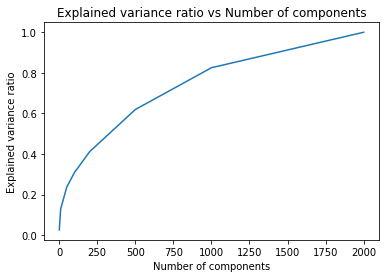

In [ ]:
number_of_components = [1,10,50,100,200,500,1000,2000]
explained_variance_ratio = np.sort(LSI.explained_variance_ratio_)[::-1]
cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(number_of_components, cum_explained_variance_ratio[np.array(number_of_components)-1])
plt.xlabel("Number of components")
plt.ylabel("Explained variance ratio")
plt.title("Explained variance ratio vs Number of components")
plt.show()


In [ ]:
# Calculate the reconstruction residual MSE error when using LS
LSI = TruncatedSVD(n_components=50,random_state = 42)
train_lsi_50 = LSI.fit_transform(train_tfidf)
test_lsi_50  = LSI.transform(test_tfidf)

In [ ]:
from scipy.sparse.linalg import svds
u1, s1, vt1 = svds(train_tfidf, k=50)
X_50 = np.dot(np.dot(u1,np.diag(s1)),vt1)
lsi_norm = np.sqrt(np.sum(np.square(X_50-train_tfidf)))
print("Squared Frobenius Norm of LSI: ", lsi_norm**2)

Squared Frobenius Norm of LSI:  1853.0591272967918


In [ ]:
from sklearn.utils.extmath import randomized_svd
u1,s1,vt1 = randomized_svd(train_tfidf,n_components=50, random_state = 42)
X_50 = np.dot(np.dot(u1,np.diag(s1)),vt1)
lsi_norm = np.sqrt(np.sum(np.square(X_50-train_tfidf)))
print("Squared Frobenius Norm of LSI: " , lsi_norm**2)

Squared Frobenius Norm of LSI:  1853.7409467600585


In [ ]:
# Calculate the reconstruction residual MSE error when using NMF
from sklearn.decomposition import NMF
nmf = NMF(n_components=50, init='random', random_state=42)
train_nmf_50 = nmf.fit_transform(train_tfidf)
test_nmf_50 = nmf.transform(test_tfidf)
H = nmf.components_

In [ ]:
nmf_norm = np.sqrt(np.sum( np.array(train_tfidf - train_nmf_50.dot(H))**2))
print("Squared Frobenius Norm of X - WH, NMF: ",nmf_norm**2)

Squared Frobenius Norm of X - WH, NMF:  1875.7529611974587


In [ ]:
#Clasification Algorithms

# Select test and train data from feature extraction and dimensionality reduction
train_data = train_lsi_50
test_data = test_lsi_50

# Recover labels from data frame
train_label = train["root_label"]
test_label = test["root_label"]

In [ ]:
# Question 5
# SVM with C = 1000 (hard margin)
from sklearn.svm import SVC

svm_C1000 = SVC(kernel = "linear", C = 1000)
svm_C1000.fit(train_data,train_label)
pred_svm_C1000 = svm_C1000.predict(test_data)


# SVM with C = 0.0001 (soft margin)

svm_C0001 = SVC(kernel = "linear", C = 0.0001)
svm_C0001.fit(train_data,train_label)
pred_svm_C0001 = svm_C0001.predict(test_data)

# SVM with C = 100000

svm_C100000 = SVC(kernel = "linear", C = 100000)
svm_C100000.fit(train_data,train_label)
pred_svm_C100000 = svm_C100000.predict(test_data)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve 

def perf_parameters(test_label, prediction,pos_label = "climate"):
  accuracy =  accuracy_score(test_label, prediction)
  precision =  precision_score(test_label, prediction, pos_label = pos_label)
  recall =  recall_score(test_label, prediction,pos_label = pos_label)
  f1 = f1_score(test_label, prediction, pos_label = pos_label)
  return accuracy,precision,recall,f1

def plot_print_perf_parameters(accuracy,precision,recall,f1, model, test_data, test_label,pos_label = "climate"):

  print("Accuracy: " ,accuracy)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F-1 Score: ", f1)
  print("Confusion Matrix: ")
  plot_confusion_matrix(model, test_data, test_label)
  plt.show()
  print("ROC Curve: ")
  plot_roc_curve(model, test_data, test_label, pos_label = pos_label)
  plt.show()

****** Performance of SVM with C = 1000 *****
Accuracy:  0.9412698412698413
Precision:  0.9154411764705882
Recall:  0.9467680608365019
F-1 Score:  0.9308411214953272
Confusion Matrix: 


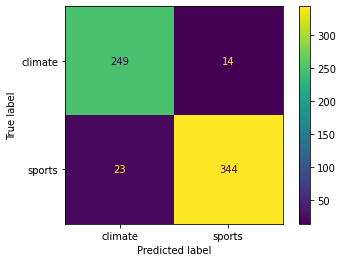

ROC Curve: 


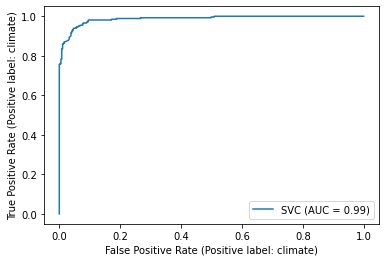




****** Performance of SVM with C = 0.0001 *****
Accuracy:  0.5825396825396826
Precision:  0.0
Recall:  0.0
F-1 Score:  0.0
Confusion Matrix: 


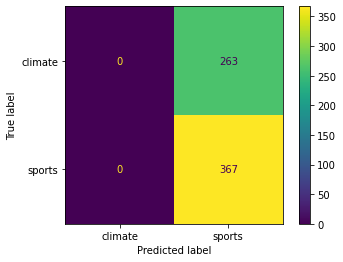

ROC Curve: 


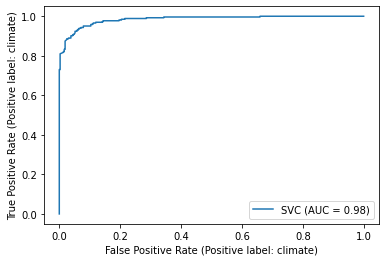




****** Performance of SVM with C = 100000 *****
Accuracy:  0.9412698412698413
Precision:  0.9124087591240876
Recall:  0.9505703422053232
F-1 Score:  0.931098696461825
Confusion Matrix: 


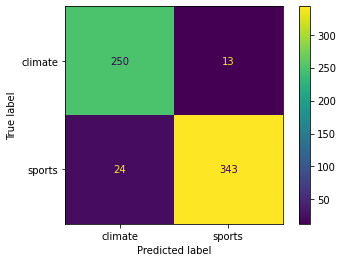

ROC Curve: 


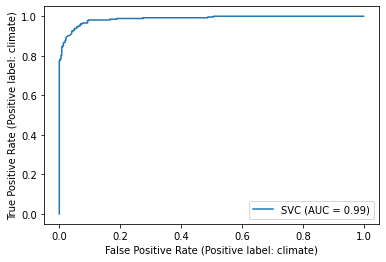

In [ ]:
#SVM 
accuracy_svm_C1000,precision_svm_C1000,recall_svm_C1000, f1_svm_C1000 =  perf_parameters(test_label, pred_svm_C1000)
accuracy_svm_C0001,precision_svm_C0001,recall_svm_C0001, f1_svm_C0001 =  perf_parameters(test_label, pred_svm_C0001)
accuracy_svm_C100000,precision_svm_C100000,recall_svm_C100000, f1_svm_C100000 =  perf_parameters(test_label, pred_svm_C100000)


print("****** Performance of SVM with C = 1000 *****")
plot_print_perf_parameters(accuracy_svm_C1000,precision_svm_C1000,recall_svm_C1000,f1_svm_C1000,svm_C1000,test_data,test_label)


print("\n\n")
print("****** Performance of SVM with C = 0.0001 *****")
plot_print_perf_parameters(accuracy_svm_C0001,precision_svm_C0001,recall_svm_C0001,f1_svm_C0001,svm_C0001,test_data,test_label)


print("\n\n")
print("****** Performance of SVM with C = 100000 *****")
plot_print_perf_parameters(accuracy_svm_C100000,precision_svm_C100000,recall_svm_C100000,f1_svm_C100000,svm_C100000,test_data,test_label)



In [ ]:
from sklearn.model_selection import cross_val_score

# Using cross_val_score to find C that performs best in terms of accuracy.
N = 10
C_list = np.geomspace(10**-3, 10**6, N, endpoint=True)

average_accuracy_list = []

#sorted(sklearn.metrics.SCORERS.keys()) # used to check scoring options below

for c in C_list:
  model_svm = SVC(kernel = "linear", C = c)
  cv_scores = cross_val_score(model_svm, train_data, train_label, cv = 5, scoring = "accuracy")
  average_accuracy_list.append(np.mean(cv_scores))

for i in range(len(average_accuracy_list)):
  print(" C = ", C_list[i]," Average Accuracy = " , average_accuracy_list[i] )

 C =  0.001  Average Accuracy =  0.5488095238095239
 C =  0.01  Average Accuracy =  0.5488095238095239
 C =  0.1  Average Accuracy =  0.9234126984126985
 C =  1.0  Average Accuracy =  0.9321428571428572
 C =  10.0  Average Accuracy =  0.9384920634920635
 C =  100.0  Average Accuracy =  0.9428571428571427
 C =  1000.0  Average Accuracy =  0.9464285714285714
 C =  10000.0  Average Accuracy =  0.942063492063492
 C =  100000.0  Average Accuracy =  0.9428571428571428
 C =  1000000.0  Average Accuracy =  0.944047619047619


In [ ]:
idx_best_c = np.argmax(average_accuracy_list)
print("Best C value is ", C_list[idx_best_c]," with average accuracy score ", average_accuracy_list[idx_best_c])

Best C value is  1000.0  with average accuracy score  0.9464285714285714


In [ ]:
# SVM with best C found above
svm_Cbest = SVC(kernel = "linear", C = C_list[idx_best_c])
svm_Cbest.fit(train_data,train_label)
pred_svm_Cbest = svm_Cbest.predict(test_data)

****** Performance of SVM with best c *****
Accuracy:  0.9412698412698413
Precision:  0.9154411764705882
Recall:  0.9467680608365019
F-1 Score:  0.9308411214953272
Confusion Matrix: 


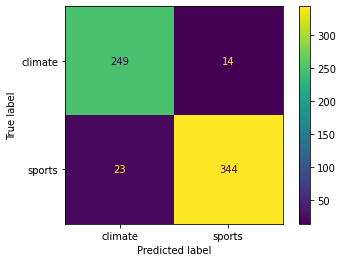

ROC Curve: 


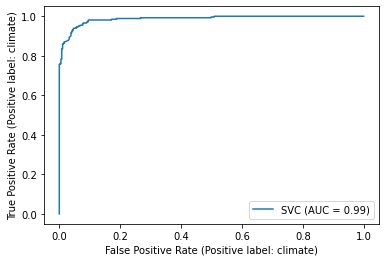

In [ ]:
accuracy_svm_Cbest,precision_svm_Cbest,recall_svm_Cbest, f1_svm_Cbest =  perf_parameters(test_label, pred_svm_Cbest)

print("****** Performance of SVM with best c *****")
plot_print_perf_parameters(accuracy_svm_Cbest,precision_svm_Cbest,recall_svm_Cbest,f1_svm_Cbest,svm_Cbest,test_data,test_label)

****** Performance of Logistic Regression without penalty term *****
Accuracy:  0.9412698412698413
Precision:  0.9154411764705882
Recall:  0.9467680608365019
F-1 Score:  0.9308411214953272
Confusion Matrix: 


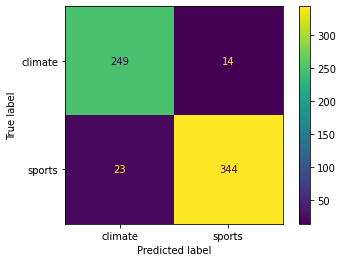

ROC Curve: 


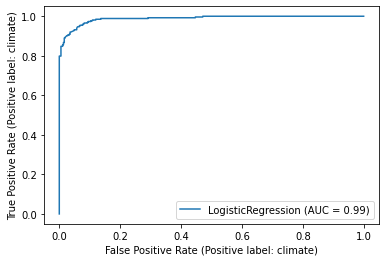

In [ ]:
# Logistic Regression # QUESTION 6
from sklearn.linear_model import LogisticRegression
# no penalty regression
log_reg_pen_none = LogisticRegression(penalty = "none")
log_reg_pen_none.fit(train_data,train_label)
pred_log_reg_pen_none = log_reg_pen_none.predict(test_data)
accuracy_log_reg_pen_none,precision_log_reg_pen_none,recall_log_reg_pen_none, f1_log_reg_pen_none =  perf_parameters(test_label, pred_log_reg_pen_none)

print("****** Performance of Logistic Regression without penalty term *****")
plot_print_perf_parameters(accuracy_log_reg_pen_none,precision_log_reg_pen_none,recall_log_reg_pen_none,f1_log_reg_pen_none,log_reg_pen_none,test_data,test_label)


In [ ]:
#L1 penalty logistic regression
N = 11
penalty_list = np.geomspace(10**-5, 10**5, N, endpoint=True)

log_reg_average_accuracy_list_l1 = []

for penalty in penalty_list:
  model_log_reg = LogisticRegression(penalty = "l1", C = penalty, solver = "liblinear" ) #liblinear or saga should be used
  cv_scores = cross_val_score(model_log_reg, train_data, train_label, cv = 5, scoring = "accuracy")
  log_reg_average_accuracy_list_l1.append(np.mean(cv_scores))

for i in range(len(log_reg_average_accuracy_list_l1)):
  print(" penalty = ", penalty_list[i]," Average Accuracy = " , log_reg_average_accuracy_list_l1[i] )

 penalty =  1e-05  Average Accuracy =  0.4511904761904762
 penalty =  0.0001  Average Accuracy =  0.4511904761904762
 penalty =  0.001  Average Accuracy =  0.4511904761904762
 penalty =  0.01  Average Accuracy =  0.4511904761904762
 penalty =  0.1  Average Accuracy =  0.9095238095238096
 penalty =  1.0  Average Accuracy =  0.932936507936508
 penalty =  10.0  Average Accuracy =  0.9424603174603174
 penalty =  100.0  Average Accuracy =  0.9468253968253968
 penalty =  1000.0  Average Accuracy =  0.9468253968253968
 penalty =  10000.0  Average Accuracy =  0.9472222222222223
 penalty =  100000.0  Average Accuracy =  0.9472222222222223


In [ ]:
idx_penalty_l1= np.argmax(log_reg_average_accuracy_list_l1)
print("(L1) Best penalty value is ", penalty_list[idx_penalty_l1]," with average accuracy score ", log_reg_average_accuracy_list_l1[idx_penalty_l1])

(L1) Best penalty value is  10000.0  with average accuracy score  0.9472222222222223


****** Performance of Logistic Regression with best penalty L1 regularization *****
Accuracy:  0.9396825396825397
Precision:  0.9120879120879121
Recall:  0.9467680608365019
F-1 Score:  0.9291044776119403
Confusion Matrix: 


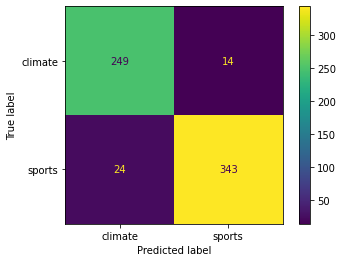

ROC Curve: 


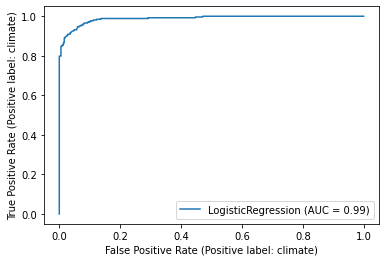

In [ ]:
#Performance of L1 regularization with best penalty
log_reg_pen_l1 = LogisticRegression(penalty = "l1", C = penalty_list[idx_penalty_l1], solver = "liblinear" )
log_reg_pen_l1.fit(train_data,train_label)
pred_log_reg_pen_l1 = log_reg_pen_l1.predict(test_data)
accuracy_log_reg_pen_l1,precision_log_reg_pen_l1,recall_log_reg_pen_l1, f1_log_reg_pen_l1 =  perf_parameters(test_label, pred_log_reg_pen_l1)

print("****** Performance of Logistic Regression with best penalty L1 regularization *****")
plot_print_perf_parameters(accuracy_log_reg_pen_l1,precision_log_reg_pen_l1,recall_log_reg_pen_l1,f1_log_reg_pen_l1,log_reg_pen_l1,test_data,test_label)


In [ ]:
#L2 penalty logistic regression
N = 11
penalty_list = np.geomspace(10**-5, 10**5, N, endpoint=True)

log_reg_average_accuracy_list_l2 = []

for penalty in penalty_list:
  model_log_reg = LogisticRegression(penalty = "l2", C = penalty, solver = "liblinear" ) 
  cv_scores = cross_val_score(model_log_reg, train_data, train_label, cv = 5, scoring = "accuracy")
  log_reg_average_accuracy_list_l2.append(np.mean(cv_scores))

for i in range(len(log_reg_average_accuracy_list_l2)):
  print(" penalty = ", penalty_list[i]," Average Accuracy = " , log_reg_average_accuracy_list_l2[i] )

 penalty =  1e-05  Average Accuracy =  0.5488095238095239
 penalty =  0.0001  Average Accuracy =  0.5488095238095239
 penalty =  0.001  Average Accuracy =  0.5488095238095239
 penalty =  0.01  Average Accuracy =  0.5674603174603174
 penalty =  0.1  Average Accuracy =  0.913095238095238
 penalty =  1.0  Average Accuracy =  0.9281746031746032
 penalty =  10.0  Average Accuracy =  0.9357142857142856
 penalty =  100.0  Average Accuracy =  0.942063492063492
 penalty =  1000.0  Average Accuracy =  0.9464285714285714
 penalty =  10000.0  Average Accuracy =  0.9464285714285714
 penalty =  100000.0  Average Accuracy =  0.9468253968253968


In [ ]:
idx_penalty_l2= np.argmax(log_reg_average_accuracy_list_l2)
print("(L2) Best penalty value is ", penalty_list[idx_penalty_l2]," with average accuracy score ", log_reg_average_accuracy_list_l2[idx_penalty_l2])

(L2) Best penalty value is  100000.0  with average accuracy score  0.9468253968253968


****** Performance of Logistic Regression with best penalty L2 regularization *****
Accuracy:  0.9396825396825397
Precision:  0.9120879120879121
Recall:  0.9467680608365019
F-1 Score:  0.9291044776119403
Confusion Matrix: 


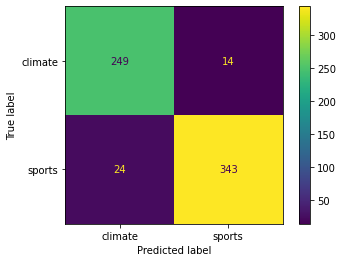

ROC Curve: 


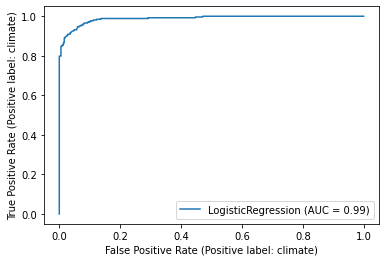

In [ ]:
#Performance of L2 regularization with best penalty
log_reg_pen_l2 = LogisticRegression(penalty = "l2", C = penalty_list[idx_penalty_l2], solver = "liblinear" )
log_reg_pen_l2.fit(train_data,train_label)
pred_log_reg_pen_l2 = log_reg_pen_l2.predict(test_data)
accuracy_log_reg_pen_l2,precision_log_reg_pen_l2,recall_log_reg_pen_l2, f1_log_reg_pen_l2 =  perf_parameters(test_label, pred_log_reg_pen_l2)

print("****** Performance of Logistic Regression with best penalty L2 regularization *****")
plot_print_perf_parameters(accuracy_log_reg_pen_l2,precision_log_reg_pen_l2,recall_log_reg_pen_l2,f1_log_reg_pen_l2,log_reg_pen_l2,test_data,test_label)


****** Performance of Gaussian Naive Bayes *****
Accuracy:  0.7888888888888889
Precision:  0.6675257731958762
Recall:  0.9847908745247148
F-1 Score:  0.7956989247311828
Confusion Matrix: 


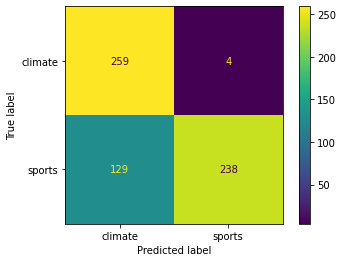

ROC Curve: 


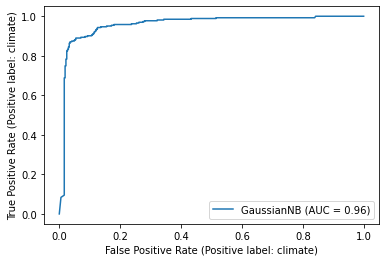




****** Performance of Bernoulli Naive Bayes *****
Accuracy:  0.8857142857142857
Precision:  0.8172757475083057
Recall:  0.935361216730038
F-1 Score:  0.8723404255319149
Confusion Matrix: 


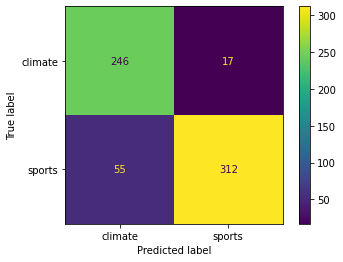

ROC Curve: 


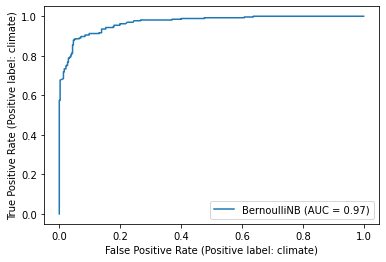

In [ ]:
# Naive Bayes Model Question 7
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

clf_gnb = GaussianNB()
clf_gnb.fit(train_data, train_label)
pred_clf_gnb = clf_gnb.predict(test_data)
accuracy_clf_gnb,precision_clf_gnb,recall_clf_gnb, f1_clf_gnb =  perf_parameters(test_label, pred_clf_gnb)

print("****** Performance of Gaussian Naive Bayes *****")
plot_print_perf_parameters(accuracy_clf_gnb,precision_clf_gnb,recall_clf_gnb,f1_clf_gnb,clf_gnb,test_data,test_label)


####EXTRA### # Multinomial requires pos values only, can be used with nmf but not with lsi

clf_bnb = BernoulliNB()
clf_bnb.fit(train_data, train_label)
pred_clf_bnb = clf_bnb.predict(test_data)
accuracy_clf_bnb,precision_clf_bnb,recall_clf_bnb, f1_clf_bnb =  perf_parameters(test_label, pred_clf_bnb)
print('\n\n')
print("****** Performance of Bernoulli Naive Bayes *****")
plot_print_perf_parameters(accuracy_clf_bnb,precision_clf_bnb,recall_clf_bnb,f1_clf_bnb,clf_bnb,test_data,test_label)


In [ ]:
# Grid Search of Parameter  Question 8

In [ ]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier

train_data = train_lsi_50
test_data = test_lsi_50
train_label = train["leaf_label"]
test_label = test["leaf_label"]

labels = ["chess","cricket","hockey","soccer","football","%22forest%20fire%22","flood","earthquake","drought"]

In [ ]:
# Multiclass Classification # Question 9

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

def perf_parameters_multi(test_label, prediction):
  accuracy =  accuracy_score(test_label, prediction)
  precision =  precision_score(test_label, prediction, average = "macro")
  recall =  recall_score(test_label, prediction,average = "macro")
  f1 = f1_score(test_label, prediction, average = "macro")
  return accuracy,precision,recall,f1

def plot_print_perf_parameters_multi(accuracy,precision,recall,f1, prediction, test_label,labels):

  print("Accuracy: " ,accuracy)
  print("Precision: ", precision)
  print("Recall: ", recall)
  print("F-1 Score: ", f1)
  print("Confusion Matrix: ")
  conf_matrix = confusion_matrix(test_label, prediction, labels = labels)
  conf_matrix_disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = labels)
  conf_matrix_disp.plot(xticks_rotation = 'vertical')
  plt.show()


Accuracy:  0.6190476190476191
Precision:  0.6311680561262082
Recall:  0.6089231734447665
F-1 Score:  0.6030937789733511
Confusion Matrix: 


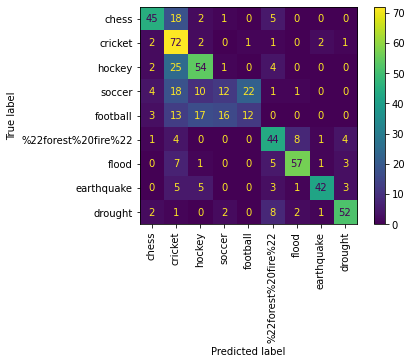

In [ ]:
#GaussianNB on multiclass
clf_gnb_multi = GaussianNB()
clf_gnb_multi.fit(train_data,train_label)
prediction_gnb_multi = clf_gnb_multi.predict(test_data)
accuracy_gnb_multi,precision_gnb_multi,recall_gnb_multi,f1_gnb_multi = perf_parameters_multi(test_label, prediction_gnb_multi)
plot_print_perf_parameters_multi(accuracy_gnb_multi,precision_gnb_multi,recall_gnb_multi,f1_gnb_multi, prediction_gnb_multi, test_label,labels)

Accuracy:  0.7380952380952381
Precision:  0.7310994751977695
Recall:  0.7281157937857858
F-1 Score:  0.7265404143453317
Confusion Matrix: 


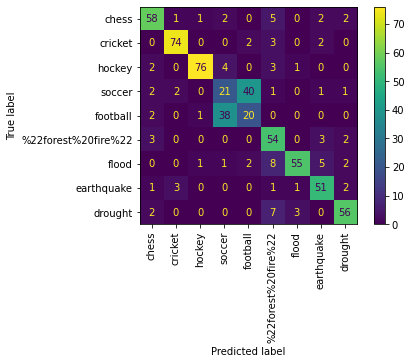

In [ ]:
#SVM OneVsOne with imbalance
clf_svm_ovo = OneVsOneClassifier(SVC(kernel = "linear", C = 1000,class_weight = None))
clf_svm_ovo.fit(train_data,train_label)
prediction_svm_ovo = clf_svm_ovo.predict(test_data)
accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo = perf_parameters_multi(test_label, prediction_svm_ovo)
plot_print_perf_parameters_multi(accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo, prediction_svm_ovo, test_label,labels)


Accuracy:  0.7396825396825397
Precision:  0.7307209528113184
Recall:  0.7295169148277005
F-1 Score:  0.7279322665710112
Confusion Matrix: 


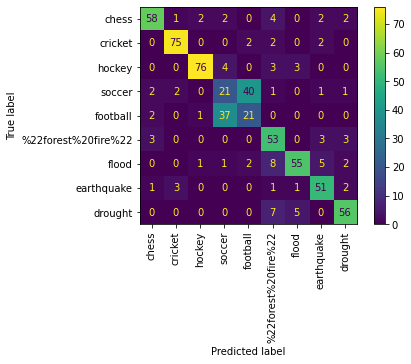

In [ ]:
#SVM OneVsOne with balanced
clf_svm_ovo = OneVsOneClassifier(SVC(kernel = "linear", C = 1000,class_weight = "balanced"))
clf_svm_ovo.fit(train_data,train_label)
prediction_svm_ovo = clf_svm_ovo.predict(test_data)
accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo = perf_parameters_multi(test_label, prediction_svm_ovo)
plot_print_perf_parameters_multi(accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo, prediction_svm_ovo, test_label,labels)


Accuracy:  0.7476190476190476
Precision:  0.7436562057736155
Recall:  0.738398125121176
F-1 Score:  0.7364042362189488
Confusion Matrix: 


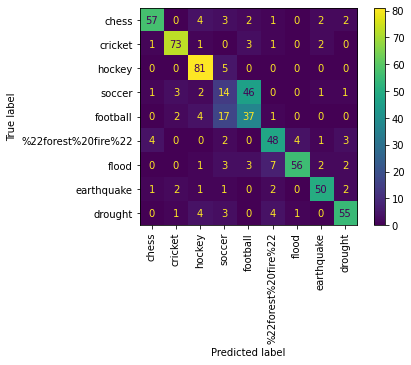

In [ ]:
#SVM OneVsRest with imbalance

clf_svm_ovr = OneVsRestClassifier(SVC(kernel = "linear", C = 1000, class_weight = None))
clf_svm_ovr.fit(train_data,train_label)
prediction_svm_ovr = clf_svm_ovr.predict(test_data)
accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr = perf_parameters_multi(test_label, prediction_svm_ovr)
plot_print_perf_parameters_multi(accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr, prediction_svm_ovr, test_label,labels)

Accuracy:  0.7698412698412699
Precision:  0.7541104194627795
Recall:  0.7615939397577111
F-1 Score:  0.7491046776462742
Confusion Matrix: 


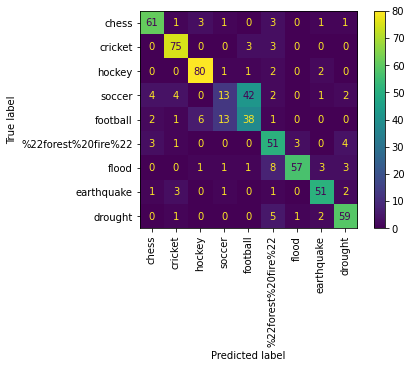

In [ ]:
#SVM OneVsRest
#balanced solves the imbalance issue explain further 
clf_svm_ovr = OneVsRestClassifier(SVC(kernel = "linear", C = 1000, class_weight = 'balanced'))
clf_svm_ovr.fit(train_data,train_label)
prediction_svm_ovr = clf_svm_ovr.predict(test_data)
accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr = perf_parameters_multi(test_label, prediction_svm_ovr)
plot_print_perf_parameters_multi(accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr, prediction_svm_ovr, test_label,labels)

In [ ]:
# Football and soccer should be merged since they refer to same sport. 
train_label_merged = train_label.copy()
test_label_merged = test_label.copy()

train_label_merged[train_label_merged == "soccer" ] = "soccer_football"
train_label_merged[train_label_merged == "football"] = "soccer_football"
test_label_merged [test_label_merged == "soccer" ] = "soccer_football"
test_label_merged [test_label_merged == "football"] = "soccer_football"

labels_merged = ["chess","cricket","hockey","soccer_football","%22forest%20fire%22","flood","earthquake","drought"]

Accuracy:  0.6793650793650794
Precision:  0.7368410786872954
Recall:  0.6984671020413693
F-1 Score:  0.6965544849737366
Confusion Matrix: 


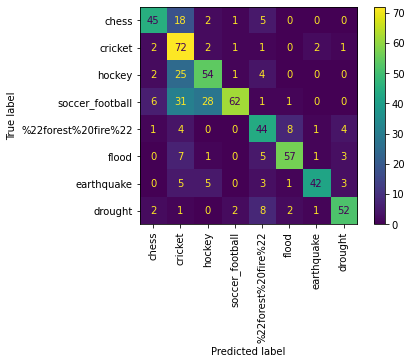

In [ ]:
#GaussianNB on multiclass with merged data
clf_gnb_multi = GaussianNB()
clf_gnb_multi.fit(train_data,train_label_merged)
prediction_gnb_multi = clf_gnb_multi.predict(test_data)
accuracy_gnb_multi,precision_gnb_multi,recall_gnb_multi,f1_gnb_multi = perf_parameters_multi(test_label_merged, prediction_gnb_multi)
plot_print_perf_parameters_multi(accuracy_gnb_multi,precision_gnb_multi,recall_gnb_multi,f1_gnb_multi, prediction_gnb_multi, test_label_merged,labels_merged)

Accuracy:  0.861904761904762
Precision:  0.8592181970040829
Recall:  0.8567435113902834
F-1 Score:  0.8544460096975244
Confusion Matrix: 


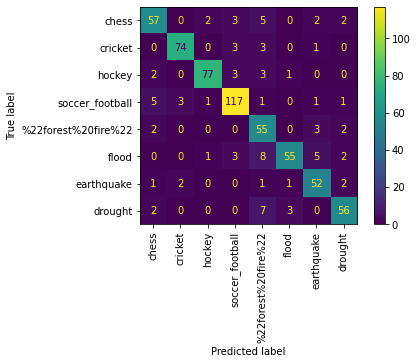

In [ ]:
#SVM OneVsOne with merged data with imbalance
clf_svm_ovo = OneVsOneClassifier(SVC(kernel = "linear", C = 1000, class_weight = None))
clf_svm_ovo.fit(train_data,train_label_merged)
prediction_svm_ovo = clf_svm_ovo.predict(test_data)
accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo = perf_parameters_multi(test_label_merged, prediction_svm_ovo)
plot_print_perf_parameters_multi(accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo, prediction_svm_ovo, test_label_merged,labels_merged)


Accuracy:  0.8603174603174604
Precision:  0.8547404744709588
Recall:  0.8552118784820564
F-1 Score:  0.8522989926254795
Confusion Matrix: 


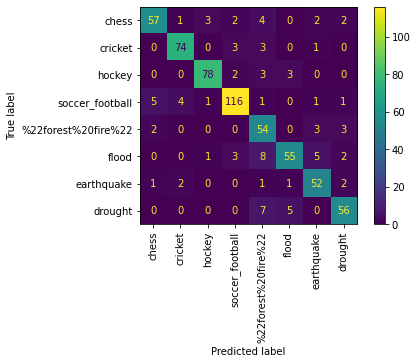

In [ ]:
#SVM OneVsOne with merged data with balanced
clf_svm_ovo = OneVsOneClassifier(SVC(kernel = "linear", C = 1000, class_weight = "balanced"))
clf_svm_ovo.fit(train_data,train_label_merged)
prediction_svm_ovo = clf_svm_ovo.predict(test_data)
accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo = perf_parameters_multi(test_label_merged, prediction_svm_ovo)
plot_print_perf_parameters_multi(accuracy_svm_ovo,precision_svm_ovo,recall_svm_ovo,f1_svm_ovo, prediction_svm_ovo, test_label_merged,labels_merged)


Accuracy:  0.8571428571428571
Precision:  0.8518579149222214
Recall:  0.8473185092753417
F-1 Score:  0.848734915376803
Confusion Matrix: 


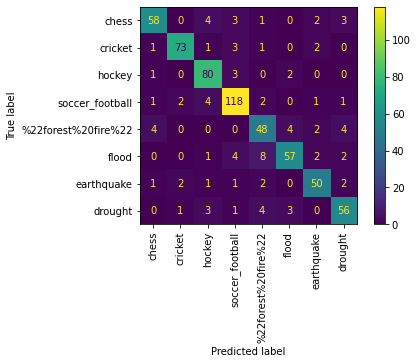

In [ ]:
#SVM OneVsREST with merged data + imbalanced
clf_svm_ovr = OneVsRestClassifier(SVC(kernel = "linear", C = 1000, class_weight = None))
clf_svm_ovr.fit(train_data,train_label_merged)
prediction_svm_ovr = clf_svm_ovr.predict(test_data)
accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr = perf_parameters_multi(test_label_merged, prediction_svm_ovr)
plot_print_perf_parameters_multi(accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr, prediction_svm_ovr, test_label_merged,labels_merged)


Accuracy:  0.8682539682539683
Precision:  0.8651588699620099
Recall:  0.8638031980347597
F-1 Score:  0.862375741635434
Confusion Matrix: 


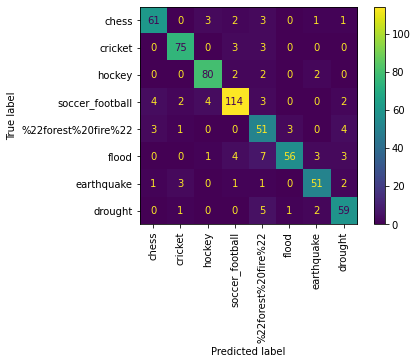

In [ ]:
#SVM OneVsREST with merged data + balanced
clf_svm_ovr = OneVsRestClassifier(SVC(kernel = "linear", C = 1000, class_weight = "balanced"))
clf_svm_ovr.fit(train_data,train_label_merged)
prediction_svm_ovr = clf_svm_ovr.predict(test_data)
accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr = perf_parameters_multi(test_label_merged, prediction_svm_ovr)
plot_print_perf_parameters_multi(accuracy_svm_ovr,precision_svm_ovr,recall_svm_ovr,f1_svm_ovr, prediction_svm_ovr, test_label_merged,labels_merged)
